In [3]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import KAMAIndicator
from ta.momentum import PercentagePriceOscillator
from ta.momentum import ROCIndicator
from ta.momentum import RSIIndicator
from ta.momentum import UltimateOscillator
from ta.volume import ForceIndexIndicator
from ta.volume import AccDistIndexIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import EaseOfMovementIndicator
from ta.volume import MFIIndicator
from ta.volume import VolumePriceTrendIndicator
from ta.volatility import BollingerBands
from ta.volatility import DonchianChannel
from ta.volatility import UlcerIndex
from ta.volatility import KeltnerChannel
from ta.trend import ADXIndicator
from ta.trend import AroonIndicator
from ta.trend import EMAIndicator
from ta.trend import MACD
from ta.trend import MassIndex
import os
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statistics import stdev
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from xgboost import XGBClassifier
import pandas as pd
import datetime as dt
import numpy as np
import random
import json
import pickle
from numpy import abs
from numpy import log
from numpy import sign
from scipy.stats import rankdata
import pandas as pd
from sklearn import preprocessing
import random
from random import sample
random.seed(1)
np.random.seed(1)
from functools import reduce
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from functools import reduce
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from ta import add_all_ta_features
from numpy import absolute
#BECAUSE WE ARE HUMAN BEING
import warnings
warnings.filterwarnings('ignore')

In [12]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_parquet("../data/compustat_raw_alpha.1.parquet")

# Fit indicators

In [14]:
def computeRSI(data, time_window):
    diff = data.diff(1).dropna()  # diff in one field(one day)

    # this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff

    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[diff > 0]

    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[diff < 0]

    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg = up_chg.ewm(com=time_window - 1, min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window - 1, min_periods=time_window).mean()

    rs = abs(up_chg_avg / down_chg_avg)
    rsi = 1 - 1 / (1 + rs)
    return rsi

# 6 month for long indicator // 1 month for short

def fit_indicators(df):
   # AwesomeOscillator = AwesomeOscillatorIndicator(high=df_a["high"],low=df_a["low"],window1 = 5,window2 =34)
    KAMA = KAMAIndicator(close = df["close"],window =4 ,pow1 = 3, pow2 = 6)
    PPO = PercentagePriceOscillator(close = df["close"],window_slow = 4, window_fast = 3, window_sign = 6)
    ROCI = ROCIndicator(close=df["close"],window=4)
    RSI = RSIIndicator(close=df["close"],window = 4)
    RSI2 = RSIIndicator(close=df["close"],window = 6)
    RSI3 = RSIIndicator(close=df["close"],window = 7)
    UO = UltimateOscillator(high = df["high"] , low = df["low"],close = df["close"],window1=4,window2=3,window3=6,weight1=4.0,weight2=2.0,weight3=1.0)
    ADI = AccDistIndexIndicator(high = df["high"], low = df["low"], close= df["close"], volume = df["volume"])
    Chaikin = ChaikinMoneyFlowIndicator(high = df["high"], low = df["low"], close= df["close"],volume=df["volume"],window = 6)   
    EOM = EaseOfMovementIndicator(high = df["high"], low = df["low"],volume=df["volume"],window = 6)
    FII = ForceIndexIndicator(close = df["close"],volume = df["volume"], window = 6)
    MFI = MFIIndicator(high = df["high"], low = df["low"],close = df["close"],volume = df["volume"],window = 6)
    VPT = VolumePriceTrendIndicator(close = df["close"],volume = df["volume"])
    BB = BollingerBands(close = df["close"],window = 6, window_dev = 2)
    Ulcer = UlcerIndex(close = df["close"], window = 6)
    EMA2 = EMAIndicator(close = df["close"],window = 2)
    EMA3 = EMAIndicator(close = df["close"],window = 3)
    EMA6 = EMAIndicator(close = df["close"],window = 6)
#    EMA50 = EMAIndicator(close = df["close"],window = 50)
#    EMA100 = EMAIndicator(close = df["close"],window = 100)
    MACD_ind = MACD(close = df["close"],window_slow = 6,window_fast = 2,window_sign=1)
    Mass = MassIndex(high = df["high"],low = df["low"], window_fast = 3,window_slow = 6)
    Aroon = AroonIndicator(close = df["close"],window = 5)
    oa = df.att - df.che
    ol = df.att - df.dlc - df.dltt - df.mib - df.pstk - df.ceq
    chact = df.act - df.act.shift(1)
    chchee = df.chee - df.chee.shift(1)
    chlct = df.lct - df.lct.shift(1)
    chdlc = df.dlc - df.dlc.shift(1)
    chtxp = df.txp - df.txp.shift(1)
    chchee = df.chee - df.chee.shift(1)
    avg_at = (df.att + df.att.shift(1)) / 2
    nca = df.att - df.act - df.ivaeq
    ncl = df.ltt - df.lct - df.dltt
    ncoa = nca - ncl
    coa = df.act - df.che
    col = df.lct - df.dlc
    wc = df.act - df.che - df.lct + df.dlc
    fna = df.ivst + df.ivao
    fnl = df.dltt + df.dlc + df.pstk
    nfna = fna - fnl
    be = df.seq - df.pstk

    df = df.assign(#AwesomeOscillator = AwesomeOscillator.awesome_oscillator(),
               KAMA = KAMA.kama(),PPO = PPO.ppo_signal(),
               ROCI = ROCI.roc(),RSI = RSI.rsi(),RSI2=RSI2.rsi(),RSI3=RSI3.rsi(),
              UO = UO.ultimate_oscillator(),
    # Accruals
    accruals_acc=((chact - chchee) - (chlct - chdlc - chtxp) - df.dp) / avg_at,
    accruals_chcoa=(coa - coa.shift(1)) / df.att.shift(1),
    accruals_chcol=(col - col.shift(1)) / df.att.shift(1),
    accruals_chnncwc=(wc - wc.shift(1)) / df.att.shift(1),
    accruals_chnncoa=(ncoa - ncoa.shift(1)) / df.att.shift(1),
    accruals_chncoa=(nca - nca.shift(1)) / df.att.shift(1),
    accruals_chncol=(ncl - ncl.shift(1)) / df.att.shift(1),
    accruals_chnfa=nfna - nfna.shift(1) / df.att.shift(1),
    accruals_chlti=(df.ivao - df.ivao.shift(1)) / df.att.shift(1),
    accruals_chce=(df.ceq - df.ceq.shift(1)) / df.att.shift(1),
    accruals_chfl=(
        df.dltt + df.dlc + df.pstk - (df.dltt + df.dlc + df.pstk).shift(1)
    )
    / df.att.shift(1),
    accruals_grii=(df.invt - df.invt.shift(1))
    / ((df.att + df.att.shift(1)) / 2),
    accruals_ich=(df.invt - df.invt.shift(1)) / df.att.shift(1),
    accruals_igr=(df.invt - df.invt.shift(1)) / df.invt.shift(1),
    accruals_nwcch=(wc - wc.shift(1)) / df.att.shift(1),
    accruals_poa=(df.nicon - df.oancf) / abs(df.nicon),
    accruals_pta=(
        df.nicon
        - (-df.sstk + df.prstkc + df.dv + df.oancf + df.ivncf + df.fincf)
    )
    / abs(df.nicon),
    accruals_ta=((ncoa + wc + nfna) - (ncoa + wc + nfna).shift(1))
    / df.att.shift(1),
    leverage_edaic=df.ebitda / df.xint,
    profitability_at=df.revt / ((oa - ol) + (oa - ol).shift(1)) / 2,
    profitability_fat=df.revt / df.ppent,
    profitability_ct=df.revt / df.att.shift(1),
    profitability_gp=(df.revt - df.cogs) / df.att.shift(1),
    profitability_opta=(df.revt - df.cogs - df.xsga + df.xrd) / df.att,
    profitability_opte=(df.revt - df.cogs - df.xsga + df.xrd) / be,
    profitability_gpm=(df.revt - df.cogs) / df.revt,
    profitability_ebitdam=df.ebitda / df.revt,
    profitability_ebitm=df.ebit / df.revt,
    profitability_ptm=df.pi / df.revt,
    profitability_npm=df.nicon / df.revt,
    profitability_roa=df.nicon / df.att,
    profitability_roe=df.nicon / be,
    profitability_roic=(df.ebit * (df.nicon / df.pi)),
     # Efficiency
    efficiency_itr=df.cogs / df.invt,
    efficiency_rtr=df.revt / df.rect,
    efficiency_apr=df.cogs / df.ap,
    efficiency_dsi=365 * df.invt / df.cogs,
    efficiency_dso=365 * df.rect / df.revt,
    efficiency_dpo=365 * df.ap / df.cogs,
    # Leverage
    leverage_de=(df.dlc + df.dltt) / be,
    leverage_da=(df.dltt + df.dlc) / df.att,
    leverage_fl=df.att / be,
    leverage_deda=(df.dltt + df.dlc) / df.ebitda,
    leverage_ndeda=(df.dltt + df.dlc - df.chee) / df.ebitda,
    leverage_eic=df.ebit / df.xint,
    leverage_cac=df.ch / df.xint,
    leverage_dcap=(df.dltt + df.dlc) / (df.dltt + df.dlc + df.teq),
    leverage_cad=df.oancf / (df.dlc + df.dltt),
    # Liquidity
    liquid_cur=df.act / df.lct,
    liquid_qur=(df.act - df.invt) / df.lct,
    liquid_car=df.chee / df.lct,
    liquid_opr=df.oancf / df.lct,
    liquid_capxr=df.capx / df.oancf,
    #other
    other_ir=(df.icapt - df.icapt.shift(1)) / (df.ebit * (df.nicon / df.pi)),
    other_nopat_g=(df.icapt - df.icapt.shift(1)) / df.icapt,
    other_rev_cagr_3=((df.revt / df.revt.shift(3)) ** (1 / 3)) - 1,
    other_ebitda_cagr_3=((df.ebitda / df.ebitda.shift(3)) ** (1 / 3)) - 1,
        # Intangible
    intangible_rds=df.xrd / df.revt,
    # Investment
    investment_agr=df.att / df.att.shift(1),
    investment_cdi=np.log(
        (df.dltt + df.dlc) / (df.dltt.shift(5) + df.dlc.shift(5))
    ),
    investment_chnoa=(
        ((oa - ol) / df.att.shift(1)) - (((oa - ol) / df.att.shift(1)).shift(1))
    )
    / df.att.shift(1),
    investment_chppeia=(
        (df.ppegt - df.ppegt.shift(1)) + (df.invt - df.invt.shift(1))
    )
    / df.att.shift(1),
    investment_griltnoa=(
        ((oa - ol) / df.att.shift(1))
        - (((oa - ol) / df.att.shift(1)).shift(1))
        - ((chact - chchee) - (chlct - chdlc - chtxp) - df.dp) / avg_at
    ),
    investment_inv=(df.capx / df.revt)
    / (
        (
            (df.capx.shift(1) / df.revt.shift(1))
            + (df.capx.shift(2) / df.revt.shift(2))
            + (df.capx.shift(3) / df.revt.shift(3))
        )
        / 3
    ),
    investment_ndf=(df.dltis - df.dltr + df.dlcch)
    / ((df.att + df.att.shift(1)) / 2),
    investment_nef=(df.sstk - df.prstkc - df.dv)
    / ((df.att + df.att.shift(1)) / 2),
    investment_noa=(oa - ol) / df.att.shift(1),
    investment_noach=(ncoa - ncoa.shift(1)) / df.att,
    investment_txfin=(df.sstk - df.dv - df.prstkc + df.dltis - df.dltr)
    / df.att,
    intangible_rdm = df.xrd / df.mcap,
    #Market
    market_dyr=df.dvc * 10 ** 6 / df.cshoc / df.prccd,
    market_pe=df.mcap / (df.nicon * 10 ** 6),
    market_pch=df.mcap / (df.oancf * 10 ** 6),
    market_ps=df.mcap / (df.revt * 10 ** 6),
    market_peg=(df.prccd / ((df.nicon * 10 ** 6) / df.cshoc))
        / (
            (
                ((df.nicon * 10 ** 6) / df.cshoc)
                / (((df.nicon * 10 ** 6) / df.cshoc).shift(1))
            )
            - 1
        ),
    market_mb=df.mcap / (df.ceq * 10 ** 6),
    market_evs=(df.mcap + (df.dlc + df.dltt + df.pstk + df.mib - df.chee) * 10 ** 6)
        / (df.revt * 10 ** 6),
        market_eveda=(
            df.mcap + (df.dlc + df.dltt + df.pstk + df.mib - df.chee) * 10 ** 6
        )
        / (df.ebitda * 10 ** 6),
    market_eve=(df.mcap + (df.dlc + df.dltt + df.pstk + df.mib - df.chee) * 10 ** 6)
        / (df.ebit * 10 ** 6),
    market_evedacpx=(
            df.mcap + (df.dlc + df.dltt + df.pstk + df.mib - df.chee) * 10 ** 6
        )
        / ((df.ebitda - df.capx) * 10 ** 6),
    market_evocf=(
            df.mcap + (df.dlc + df.dltt + df.pstk + df.mib - df.chee) * 10 ** 6
        )
        / ((df.oancf) * 10 ** 6),
    ADI = ADI.acc_dist_index(),
    Chaikin = Chaikin.chaikin_money_flow(), EOM = EOM.ease_of_movement(),EOMS = EOM.sma_ease_of_movement(),
    FII = FII.force_index(), MFI = MFI.money_flow_index(), VPT = VPT.volume_price_trend(),
    BBHigh = BB.bollinger_hband(),BBLow=BB.bollinger_lband(),BBHighInd=BB.bollinger_hband_indicator(),
    BBLowInd= BB.bollinger_lband_indicator(),Ulcer = Ulcer.ulcer_index(), AroonDown = Aroon.aroon_down(),
    AroonUp = Aroon.aroon_up(),AroonInd = Aroon.aroon_indicator(),Mass=Mass.mass_index(),MACD = MACD_ind.macd_signal(),
    EMA2 = EMA2.ema_indicator(),
    EMA3 = EMA3.ema_indicator(),
    EMA6 = EMA6.ema_indicator())
    return df

In [16]:
df1 = (df.groupby('gvkey').apply(fit_indicators))
df2 = df1.groupby('gvkey').apply(lambda group: group.iloc[7:])

# Model

In [ ]:
# Change the indicators you want to run in the list below log_return is mandatory
def be_momentum(df):
    df["mom_1m"] = np.log(df.close)-np.log(df.close.shift(1))
 #   df["mom_3m"] = np.log(df.close)-np.log(df.close.shift(3))
    df["log_return"] = np.log(df.close.shift(-3)) - np.log(df.close)
    return df.loc[df.prccd > 3, ['mom_1m','log_return','RSI','profitability_opta','profitability_gp',
                                 'profitability_ct','profitability_ptm','profitability_at','EMA3','profitability_roic',
                                 'investment_noa','profitability_roe','profitability_npm',
                                 'investment_agr','accruals_grii',
                                 'accruals_chncol','accruals_nwcch','ADI','efficiency_rtr',
                                 'efficiency_dso','leverage_de','market_pe','market_mb',
                                 'market_eveda','BBHighInd','VPT','Mass','MFI','liquid_cur','RSI2','RSI3','accruals_acc',
                                 'BBLowInd','MACD','profitability_opte','EMA2','market_evs','profitability_ebitm'
                                ]].dropna()

In [ ]:
def be_extreme(df):
    """Retain the 20% values that are the smallest and the 20% that are the largest."""
    top = df.log_return.quantile(0.65)
    low = df.log_return.quantile(0.35)
    return df[(df.log_return < low) | (df.log_return > top)]

In [ ]:
# Pick the indicators to run with in the list below, prccd and close are mandatory
df_basic = df2[['prccd','close','RSI','profitability_opta','profitability_gp',
                                 'profitability_ct','profitability_ptm','profitability_at','EMA3','profitability_roic',
                                 'investment_noa','profitability_roe','profitability_npm',
                                 'investment_agr','investment_nef','accruals_grii','accruals_acc',
                                 'accruals_chncol','accruals_chce','accruals_nwcch','accruals_chcol','MACD','ADI','efficiency_rtr',
                                 'efficiency_dso','leverage_de','market_pe','market_mb',
                                 'market_eveda','BBHighInd','AroonDown','VPT','Mass','MFI','intangible_rdm','liquid_cur','RSI2','RSI3',
               'BBLowInd','MACD','profitability_opte','EMA2','profitability_ebitm','market_evs']]

df_mom = df_basic.groupby('gvkey').apply(be_momentum)
# df_mom.plot.scatter(x="mom_6m", y="log_return")

In [157]:
# Checking metrics for df_mom
df_mom.head(10)

mom_1m  log_return        RSI  \
gvkey  gvkey  gvkey  date                                          
001166 001166 001166 2000-09-30 -0.351949    0.874419  20.314459   
                     2000-10-31 -0.050902   -0.030380  18.610255   
                     2000-11-30 -0.327634   -0.092105  11.642879   
                     2000-12-31 -0.249763   -0.461153   9.063580   
                     2001-01-31  0.608248   -0.228516  51.412750   
                     2001-02-28 -0.261858   -0.414258  39.129378   
                     2001-03-31  0.271934   -0.136364  54.320479   
                     2001-04-30  0.249363   -0.030303  67.273577   
                     2001-05-31  0.013579    0.111349  68.022530   
                     2001-06-30 -0.116339    0.804688  54.484773   

                                 profitability_opta  profitability_gp  \
gvkey  gvkey  gvkey  date                                               
001166 001166 001166 2000-09-30            0.372045          0.457602   
                     2000-10-31            0.372045          0.457602   
                     2000-11-30            0.372045          0.457602   
                     2000-12-31            0.508895          1.104398   
                     2001-01-31            0.508895          0.603399   
                     2001-02-28            0.508895          0.603399   
                     2001-03-31            0.508895          0.603399   
                     2001-04-30            0.508895          0.603399   
                     2001-05-31            0.508895          0.603399   
                     2001-06-30            0.508895          0.603399   

                                 profitability_ct  profitability_ptm  \
gvkey  gvkey  gvkey  date                                              
001166 001166 001166 2000-09-30          0.975202           0.074179   
                     2000-10-31          0.975202           0.074179   
                     2000-11-30          0.975202           0.074179   
                     2000-12-31          2.200318           0.203352   
                     2001-01-31          1.202165           0.203352   
                     2001-02-28          1.202165           0.203352   
                     2001-03-31          1.202165           0.203352   
                     2001-04-30          1.202165           0.203352   
                     2001-05-31          1.202165           0.203352   
                     2001-06-30          1.202165           0.203352   

                                 profitability_at       EMA3  \
gvkey  gvkey  gvkey  date                                      
001166 001166 001166 2000-09-30          0.439618  24.469727   
                     2000-10-31          0.439618  21.809863   
                     2000-11-30          0.439618  17.804932   
                     2000-12-31          0.750047  14.277466   
                     2001-01-31          0.603016  17.013733   
                     2001-02-28          0.603016  16.106866   
                     2001-03-31          0.603016  18.028433   
                     2001-04-30          0.603016  21.814217   
                     2001-05-31          0.603016  23.882108   
                     2001-06-30          0.603016  23.491054   

                                 profitability_roic  investment_noa  \
gvkey  gvkey  gvkey  date                                             
001166 001166 001166 2000-09-30           14.206301        0.554573   
                     2000-10-31           14.206301        0.554573   
                     2000-11-30           14.206301        0.554573   
                     2000-12-31           95.062652        0.912214   
                     2001-01-31           95.062652        0.498397   
                     2001-02-28           95.062652        0.498397   
                     2001-03-31           95.062652        0.498397   
                     2001-04-30           95.062652        0.498397 

In [158]:
# Balance with median
def be_balance(df):
    """Returns minus a cross-sectional median"""
    median = df.log_return.quantile(0.5)
    df["y"] = np.log(df.log_return.shift(3)) - np.log(df.log_return)
    return df

In [160]:
df_train = df_mom.xs(slice("2002-01-01", "2013-01-01"), level="date", drop_level=False).groupby("date").apply(be_balance)
df_test = df_mom.xs(slice("2013-01-01", "2016-01-01"), level="date", drop_level=False).groupby("date").apply(be_balance)
X_train = df_train.drop(["log_return",'y'], axis=1).to_numpy()
y_train = df_train["y"].to_numpy()
X_test = df_test.drop(["log_return",'y'], axis=1).to_numpy()
y_test = df_test["y"].to_numpy()

In [161]:
#dfadf1 =df_train.head(132)
#dfadf2 = df_train.tail(77)
#from statsmodels.tsa.stattools import adfuller
#for i in dfadf2.columns:
#    X = pd.to_numeric(dfadf2[i])
#    result = adfuller(X)
#    print(i)
#    print('p-value: %f' % result[1])
#    print('')
#for i in dfadf1.columns:
#    dfadf1[i].plot()
#    plt.show()

In [162]:
# Run the model
xgb_reg = XGBClassifier(n_estimators=100, max_depth=3, n_jobs=-1,eval_metric='logloss',learning_rate=0.03,min_child_weight=5,colsample_bytree=0.5)
xgb_fit = xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
y_proba = xgb_reg.predict_proba(X_test)

In [163]:
# Model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, precision_score, recall_score, balanced_accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import xgboost as xgb
import matplotlib.pyplot as pl
import xgboost as xgb

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(xgb_reg, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#print("Mean cross validation score and the st-deviation",absolute(scores.mean()),scores.std())
#print("R2 train",xgb_reg.score(X_train, y_train))
#print("R2 test",xgb_reg.score(X_test, y_test))
#print("MSE",mean_squared_error(y_test,y_pred))
positive_class = []
for i in y_proba:
    positive_class.append(i[1])


#xgb.plot_importance(xgb_fit)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
auc = roc_auc_score(y_test, positive_class)
print('AUC: %.2f%%' % (auc*100.0))

Accuracy: 56.08%
AUC: 58.42%


<AxesSubplot:>

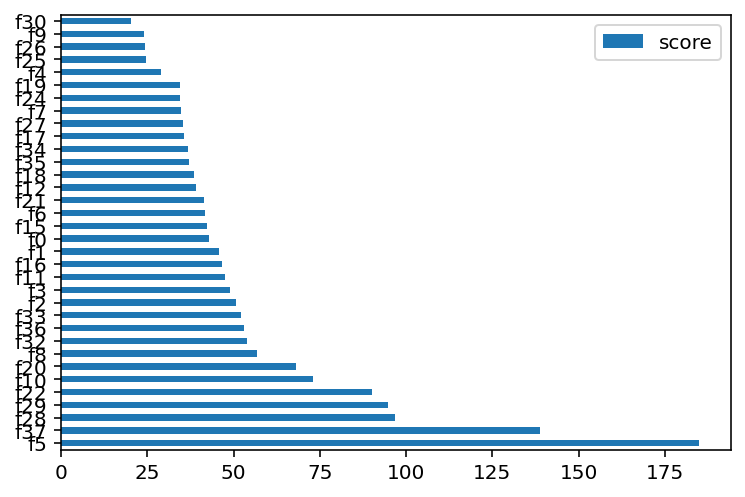

In [164]:
feature_important = xgb_fit.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())
%config InlineBackend.figure_format = 'retina'
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [92]:
# Experiment with different hyperparameters 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {
     'max_depth':[3], 
     'n_estimators':[100,150,200],
  #   'learning_rate':[0.03],
  #   'gamma':[0.0,0.02,0.03]
  #   "min_child_weight" : [ 1, 3, 5 ]
  #   "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
             }
tuning_model = XGBClassifier(eval_metric='logloss')
clf = GridSearchCV(tuning_model, parameters,n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [ ]:
def threshold(y):
    thres = 0.1
    y_0 = np.where(y < -thres, -1, y)
    y_1 = np.where((y <= thres) & (y >= -thres), 0, y_0)
    y_2 = np.where(y > thres, 1, y_1)
    return y_2

In [ ]:
df_train = df_mom.xs(slice("2002-01-01", "2008-01-01"), level="date", drop_level=False).groupby("date").apply(extreme)
df_test = df_mom.xs(slice("2008-01-01", "2012-01-01"), level="date", drop_level=False)
X_train = df_train.drop(["y"], axis=1).to_numpy()
y_train= threshold(df_train.y)
X_test = df_test.drop(["y"], axis=1).to_numpy()
y_test = threshold(df_test.y)
xgb_clf = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='logloss', n_jobs=-1)
xgb_fit = xgb_clf.fit(X_train, y_train)
y_pred= xgb_clf.predict(X_test)
train_score = accuracy_score(y_train, xgb_clf.predict(X_train))
test_score = accuracy_score(y_test, y_pred)
print(f"Accuracy on training set: {train_score}\nAccuracy on test set: {test_score}")
print(classification_report(y_test, y_pred, target_names=["sell", "hold", "buy"]))